In [138]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sqlalchemy import create_engine
import seaborn as sns

In [140]:
appointments = pd.read_csv("appointments_dataset.csv")
feedback = pd.read_csv("feedback_and_surveys_data.csv")
outcomes = pd.read_csv("healthcare_outcomes_data.csv")
comms = pd.read_csv("patient_communication_data.csv")
demographics = pd.read_csv("patient_demographic_data (1).csv")
resources = pd.read_csv("resource_availability.csv") #short
staff = pd.read_csv("staff_schedule.csv") #short 

In [142]:
appointments.head(20)

,Appointment ID,Patient ID,Date and Time of Appointment,Duration of Appointment (minutes),Type of Appointment,Status
0,1,P0059,2021-04-26 12:18,82.4,Therapy,Canceled
1,2,P0369,2020-10-08 12:11,82.6,Follow-up,Missed
2,3,P0231,2018-10-07 13:06,94.6,Screening,Missed
3,4,P0206,2019-09-05 14:52,141.7,Therapy,Missed
4,5,P0093,2023-01-29 15:50,27.7,Therapy,Scheduled
5,6,P0264,2021-03-15 11:40,87.1,Consultation,Missed
6,7,P0377,2019-06-10 09:04,101.7,Screening,Scheduled
7,8,P0242,2021-03-07 09:37,113.8,Consultation,Scheduled
8,9,P0113,2016-03-01 11:46,23.6,Therapy,Scheduled
9,10,P0431,2020-07-10 09:49,132.3,Follow-up,Scheduled


In [144]:
appointments.dtypes

Appointment ID                         int64
Patient ID                            object
Date and Time of Appointment          object
Duration of Appointment (minutes)    float64
Type of Appointment                   object
Status                                object
dtype: object

In [146]:
appointments["Date and Time of Appointment"] = pd.to_datetime(appointments["Date and Time of Appointment"])

In [148]:
appointments['Status'] = appointments['Status'].astype('category')

In [150]:
appointments['Appointment Time'] = appointments["Date and Time of Appointment"].dt.time

In [152]:
appointments['Day of Week'] = appointments["Date and Time of Appointment"].dt.day_name()

In [154]:
appointments['Month'] = appointments["Date and Time of Appointment"].dt.month

In [156]:
appointments['Year'] = appointments["Date and Time of Appointment"].dt.year

In [158]:
appointments

,Appointment ID,Patient ID,Date and Time of Appointment,Duration of Appointment (minutes),Type of Appointment,Status,Appointment Time,Day of Week,Month,Year
0,1,P0059,2021-04-26 12:18:00,82.4,Therapy,Canceled,12:18:00,Monday,4,2021
1,2,P0369,2020-10-08 12:11:00,82.6,Follow-up,Missed,12:11:00,Thursday,10,2020
2,3,P0231,2018-10-07 13:06:00,94.6,Screening,Missed,13:06:00,Sunday,10,2018
3,4,P0206,2019-09-05 14:52:00,141.7,Therapy,Missed,14:52:00,Thursday,9,2019
4,5,P0093,2023-01-29 15:50:00,27.7,Therapy,Scheduled,15:50:00,Sunday,1,2023
...,...,...,...,...,...,...,...,...,...,...
4995,4996,P0157,2023-06-29 14:21:00,45.7,Check-up,Missed,14:21:00,Thursday,6,2023
4996,4997,P0118,2022-05-09 14:23:00,54.7,Screening,Scheduled,14:23:00,Monday,5,2022
4997,4998,P0082,2017-08-09 09:32:00,105.8,Check-up,Missed,09:32:00,Wednesday,8,2017
4998,4999,P0257,2022-02-07 16:17:00,98.9,Therapy,Missed,16:17:00,Monday,2,2022


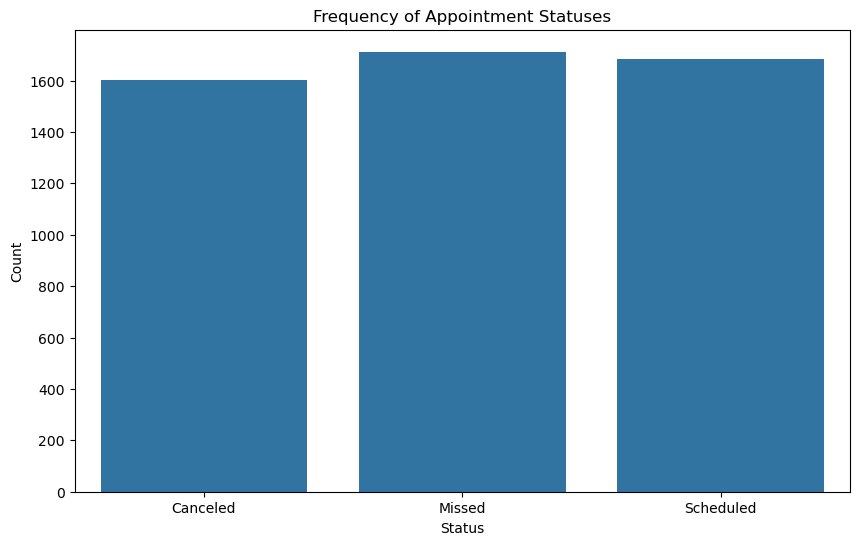

In [160]:
status_counts = appointments['Status'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=status_counts.index, y=status_counts.values)
plt.title('Frequency of Appointment Statuses')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

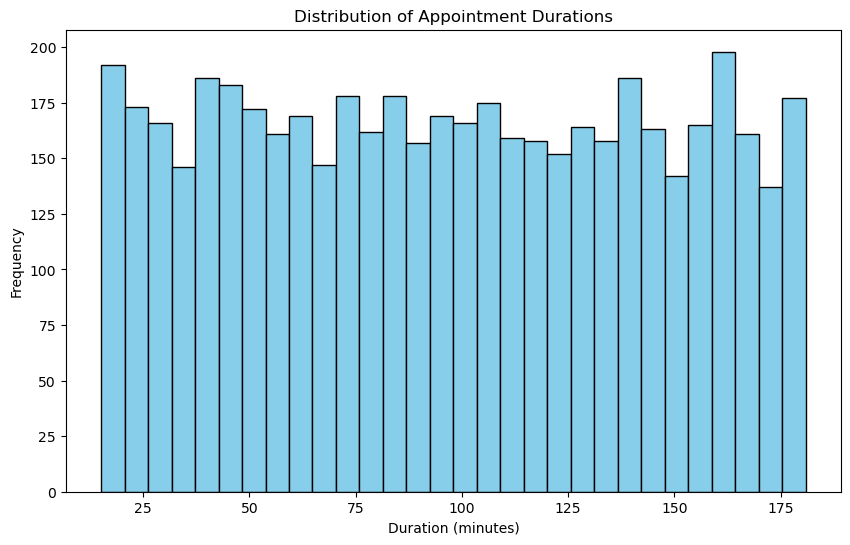

In [162]:
plt.figure(figsize=(10, 6))
plt.hist(appointments['Duration of Appointment (minutes)'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Appointment Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

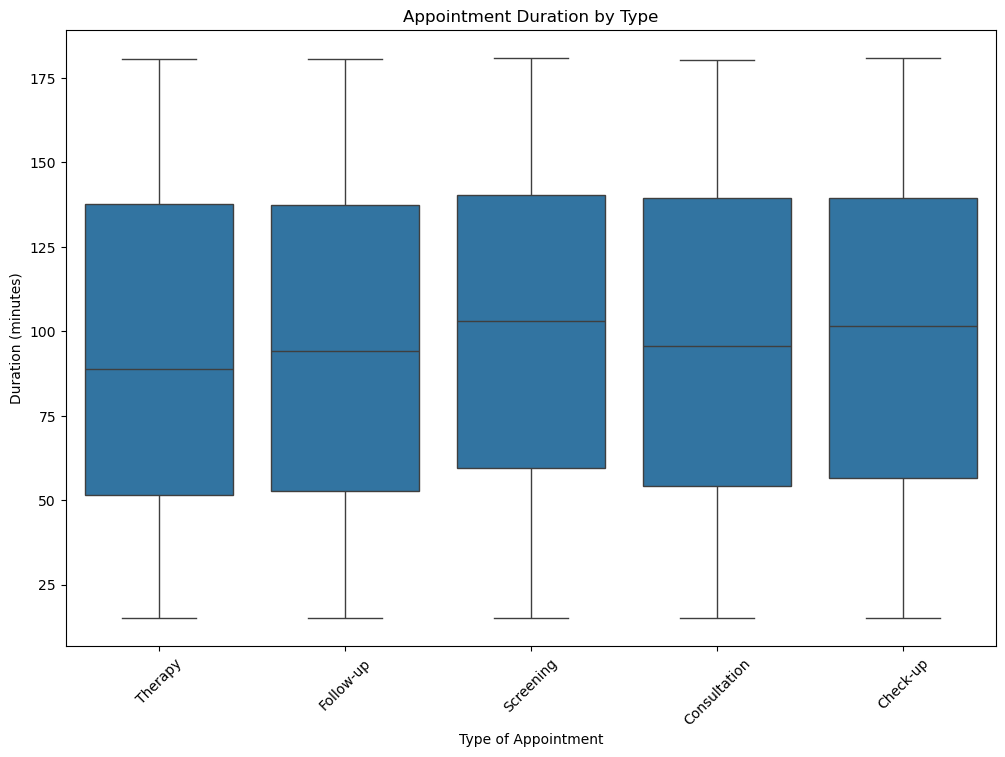

In [164]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Type of Appointment', y='Duration of Appointment (minutes)', data=appointments)
plt.title('Appointment Duration by Type')
plt.xlabel('Type of Appointment')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)  # Helps in case the labels overlap
plt.show()


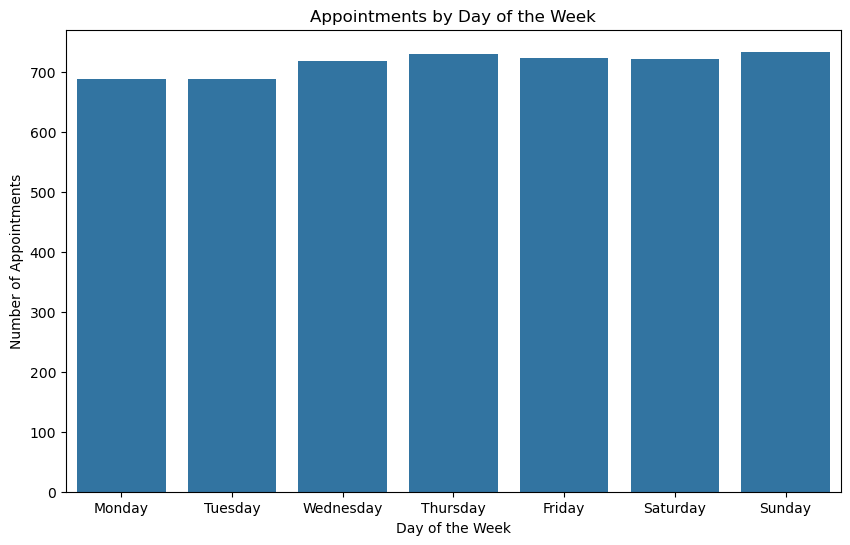

In [165]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Day of Week', data=appointments, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Appointments by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Appointments')
plt.show()


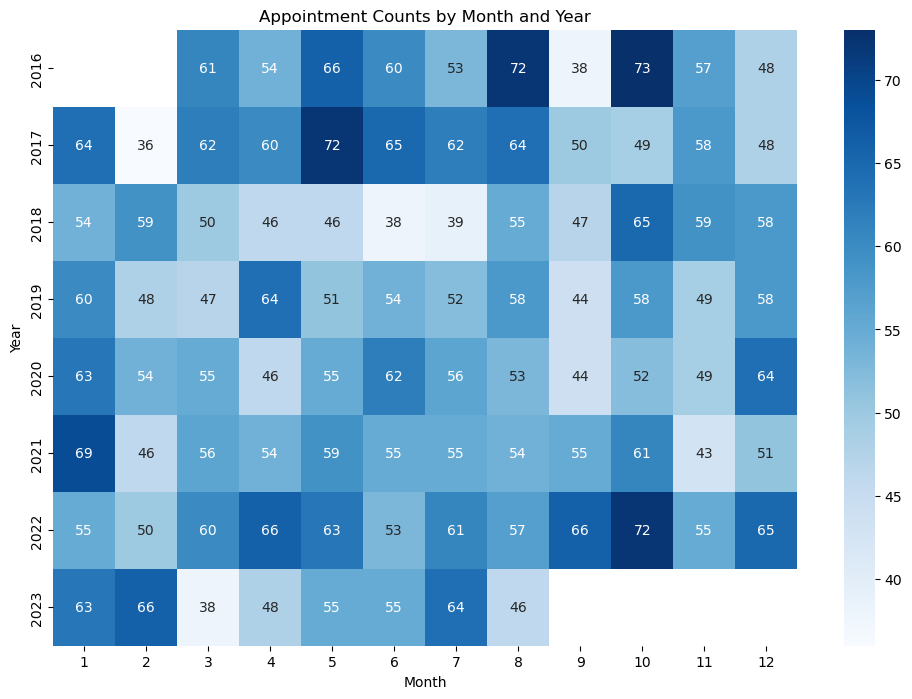

In [168]:
appointment_matrix = appointments.pivot_table(index='Year', columns='Month', values='Appointment ID', aggfunc='count')
plt.figure(figsize=(12, 8))
sns.heatmap(appointment_matrix, annot=True, fmt=".0f", cmap='Blues')
plt.title('Appointment Counts by Month and Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


In [170]:
engine = create_engine('sqlite:///:memory:')

In [172]:
appointments.to_sql('appointments', engine, index=False, if_exists='replace')

5000

In [174]:
appointments['Year'].unique()

array([2021, 2020, 2018, 2019, 2023, 2016, 2017, 2022], dtype=int32)

In [402]:
query = """
SELECT Month,
COUNT(*) AS Total_Appointments,
SUM(CASE WHEN Status = 'Canceled' THEN 1 ELSE 0 END) AS Canceled,
SUM(CASE WHEN Status = 'Missed' THEN 1 ELSE 0 END) AS Missed,
SUM(CASE WHEN Status = 'Scheduled' THEN 1 ELSE 0 END) AS Scheduled
FROM appointments
WHERE Year = 2016
GROUP BY Month
ORDER BY Month
"""
result_2016 = pd.read_sql_query(query, engine)
aptByMonth2016 = pd.DataFrame(result_2016)
aptByMonth2016.to_csv('aptByMonth2016.csv')
aptByMonth2016

,Month,Total_Appointments,Canceled,Missed,Scheduled
0,3,61,25,16,20
1,4,54,13,25,16
2,5,66,20,24,22
3,6,60,27,20,13
4,7,53,19,16,18
5,8,72,27,22,23
6,9,38,11,13,14
7,10,73,25,18,30
8,11,57,19,14,24
9,12,48,18,12,18


In [404]:
query1 = """
SELECT Month,
COUNT(*) AS Total_Appointments,
SUM(CASE WHEN Status = 'Canceled' THEN 1 ELSE 0 END) AS Canceled,
SUM(CASE WHEN Status = 'Missed' THEN 1 ELSE 0 END) AS Missed,
SUM(CASE WHEN Status = 'Scheduled' THEN 1 ELSE 0 END) AS Scheduled
FROM appointments
WHERE Year = 2017
GROUP BY Month
ORDER BY Month
"""
result_2017 = pd.read_sql_query(query1, engine)
aptByMonth2017 = pd.DataFrame(result_2017)
aptByMonth2017.to_csv('aptByMonth2017.csv')
aptByMonth2017

,Month,Total_Appointments,Canceled,Missed,Scheduled
0,1,64,27,14,23
1,2,36,14,12,10
2,3,62,26,15,21
3,4,60,24,16,20
4,5,72,24,22,26
5,6,65,20,25,20
6,7,62,11,27,24
7,8,64,18,24,22
8,9,50,21,12,17
9,10,49,17,17,15


In [406]:
query2 = """
SELECT Month,
COUNT(*) AS Total_Appointments,
SUM(CASE WHEN Status = 'Canceled' THEN 1 ELSE 0 END) AS Canceled,
SUM(CASE WHEN Status = 'Missed' THEN 1 ELSE 0 END) AS Missed,
SUM(CASE WHEN Status = 'Scheduled' THEN 1 ELSE 0 END) AS Scheduled
FROM appointments
WHERE Year = 2018
GROUP BY Month
ORDER BY Month
"""
result_2018 = pd.read_sql_query(query2, engine)
aptByMonth2018 = pd.DataFrame(result_2018)
aptByMonth2018.to_csv('aptByMonth2018.csv')
aptByMonth2018

,Month,Total_Appointments,Canceled,Missed,Scheduled
0,1,54,16,18,20
1,2,59,14,23,22
2,3,50,19,17,14
3,4,46,14,18,14
4,5,46,11,20,15
5,6,38,15,12,11
6,7,39,9,11,19
7,8,55,14,17,24
8,9,47,11,17,19
9,10,65,19,17,29


In [408]:
query3 = """
SELECT Month,
COUNT(*) AS Total_Appointments,
SUM(CASE WHEN Status = 'Canceled' THEN 1 ELSE 0 END) AS Canceled,
SUM(CASE WHEN Status = 'Missed' THEN 1 ELSE 0 END) AS Missed,
SUM(CASE WHEN Status = 'Scheduled' THEN 1 ELSE 0 END) AS Scheduled
FROM appointments
WHERE Year = 2019
GROUP BY Month
ORDER BY Month
"""
result_2019 = pd.read_sql_query(query3, engine)
aptByMonth2019 = pd.DataFrame(result_2019)
aptByMonth2019.to_csv('aptByMonth2019.csv')
aptByMonth2019

,Month,Total_Appointments,Canceled,Missed,Scheduled
0,1,60,14,26,20
1,2,48,15,20,13
2,3,47,22,9,16
3,4,64,18,23,23
4,5,51,20,15,16
5,6,54,23,13,18
6,7,52,16,18,18
7,8,58,22,20,16
8,9,44,12,18,14
9,10,58,22,19,17


In [410]:
query4 = """
SELECT Month,
COUNT(*) AS Total_Appointments,
SUM(CASE WHEN Status = 'Canceled' THEN 1 ELSE 0 END) AS Canceled,
SUM(CASE WHEN Status = 'Missed' THEN 1 ELSE 0 END) AS Missed,
SUM(CASE WHEN Status = 'Scheduled' THEN 1 ELSE 0 END) AS Scheduled
FROM appointments
WHERE Year = 2020
GROUP BY Month
ORDER BY Month
"""
result_2020 = pd.read_sql_query(query4, engine)
aptByMonth2020 = pd.DataFrame(result_2020)
aptByMonth2020.to_csv('aptByMonth2020.csv')
aptByMonth2020

,Month,Total_Appointments,Canceled,Missed,Scheduled
0,1,63,19,23,21
1,2,54,17,17,20
2,3,55,17,19,19
3,4,46,17,20,9
4,5,55,13,18,24
5,6,62,18,29,15
6,7,56,17,23,16
7,8,53,22,15,16
8,9,44,15,13,16
9,10,52,19,17,16


In [412]:
query5 = """
SELECT Month,
COUNT(*) AS Total_Appointments,
SUM(CASE WHEN Status = 'Canceled' THEN 1 ELSE 0 END) AS Canceled,
SUM(CASE WHEN Status = 'Missed' THEN 1 ELSE 0 END) AS Missed,
SUM(CASE WHEN Status = 'Scheduled' THEN 1 ELSE 0 END) AS Scheduled
FROM appointments
WHERE Year = 2021
GROUP BY Month
ORDER BY Month
"""
result_2021 = pd.read_sql_query(query5, engine)
aptByMonth2021 = pd.DataFrame(result_2021)
aptByMonth2021.to_csv('aptByMonth2021.csv')
aptByMonth2021

,Month,Total_Appointments,Canceled,Missed,Scheduled
0,1,69,21,30,18
1,2,46,16,13,17
2,3,56,12,19,25
3,4,54,9,21,24
4,5,59,15,24,20
5,6,55,15,20,20
6,7,55,15,17,23
7,8,54,18,21,15
8,9,55,17,21,17
9,10,61,20,28,13


In [414]:
query6 = """
SELECT Month,
COUNT(*) AS Total_Appointments,
SUM(CASE WHEN Status = 'Canceled' THEN 1 ELSE 0 END) AS Canceled,
SUM(CASE WHEN Status = 'Missed' THEN 1 ELSE 0 END) AS Missed,
SUM(CASE WHEN Status = 'Scheduled' THEN 1 ELSE 0 END) AS Scheduled
FROM appointments
WHERE Year = 2022
GROUP BY Month
ORDER BY Month
"""
result_2022 = pd.read_sql_query(query6, engine)
aptByMonth2022 = pd.DataFrame(result_2022)
aptByMonth2022.to_csv('aptByMonth2022.csv')
aptByMonth2022

,Month,Total_Appointments,Canceled,Missed,Scheduled
0,1,55,15,18,22
1,2,50,14,18,18
2,3,60,28,15,17
3,4,66,32,13,21
4,5,63,14,18,31
5,6,53,17,16,20
6,7,61,15,27,19
7,8,57,18,22,17
8,9,66,25,16,25
9,10,72,22,30,20


In [416]:
query7 = """
SELECT Month,
COUNT(*) AS Total_Appointments,
SUM(CASE WHEN Status = 'Canceled' THEN 1 ELSE 0 END) AS Canceled,
SUM(CASE WHEN Status = 'Missed' THEN 1 ELSE 0 END) AS Missed,
SUM(CASE WHEN Status = 'Scheduled' THEN 1 ELSE 0 END) AS Scheduled
FROM appointments
WHERE Year = 2023
GROUP BY Month
ORDER BY Month
"""
result_2023 = pd.read_sql_query(query7, engine)
aptByMonth2023 = pd.DataFrame(result_2023)
aptByMonth2023.to_csv('aptByMonth2023.csv')
aptByMonth2023

,Month,Total_Appointments,Canceled,Missed,Scheduled
0,1,63,21,23,19
1,2,66,19,24,23
2,3,38,9,24,5
3,4,48,18,15,15
4,5,55,13,26,16
5,6,55,14,22,19
6,7,64,21,18,25
7,8,46,16,17,13


In [284]:
dataframes = {
    2016: aptByMonth2016,
    2017: aptByMonth2017,
    2018: aptByMonth2018,
     2019: aptByMonth2019,
    2020: aptByMonth2020,
}

In [194]:
#array([2021, 2020, 2018, 2019, 2023, 2016, 2017, 2022], dtype=int32)

In [286]:
all_years_data = pd.concat(
    [df.assign(Year=year) for year, df in dataframes.items()],
    ignore_index=True
)

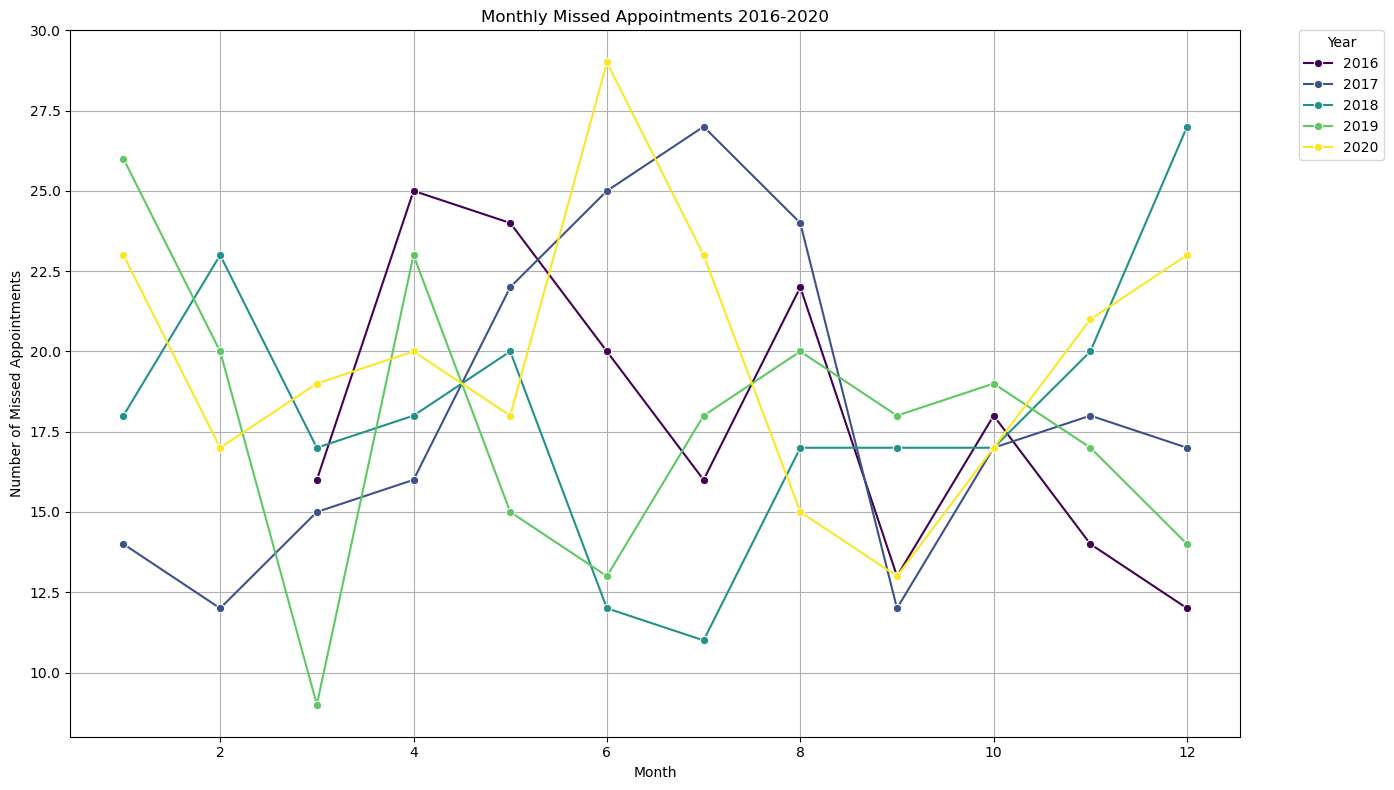

In [298]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=all_years_data, x='Month', y='Missed', hue='Year', marker='o', style='Year', dashes=False, palette='viridis')
plt.title('Monthly Missed Appointments 2016-2020')
plt.xlabel('Month')
plt.ylabel('Number of Missed Appointments')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)
plt.tight_layout()
plt.show()

In [290]:
dataframes2 = {
    2021:aptByMonth2021,
    2022:aptByMonth2022,
    2023: aptByMonth2023,
}

In [292]:
five_years_data = pd.concat(
    [df.assign(Year=year) for year, df in dataframes2.items()],
    ignore_index=True
)

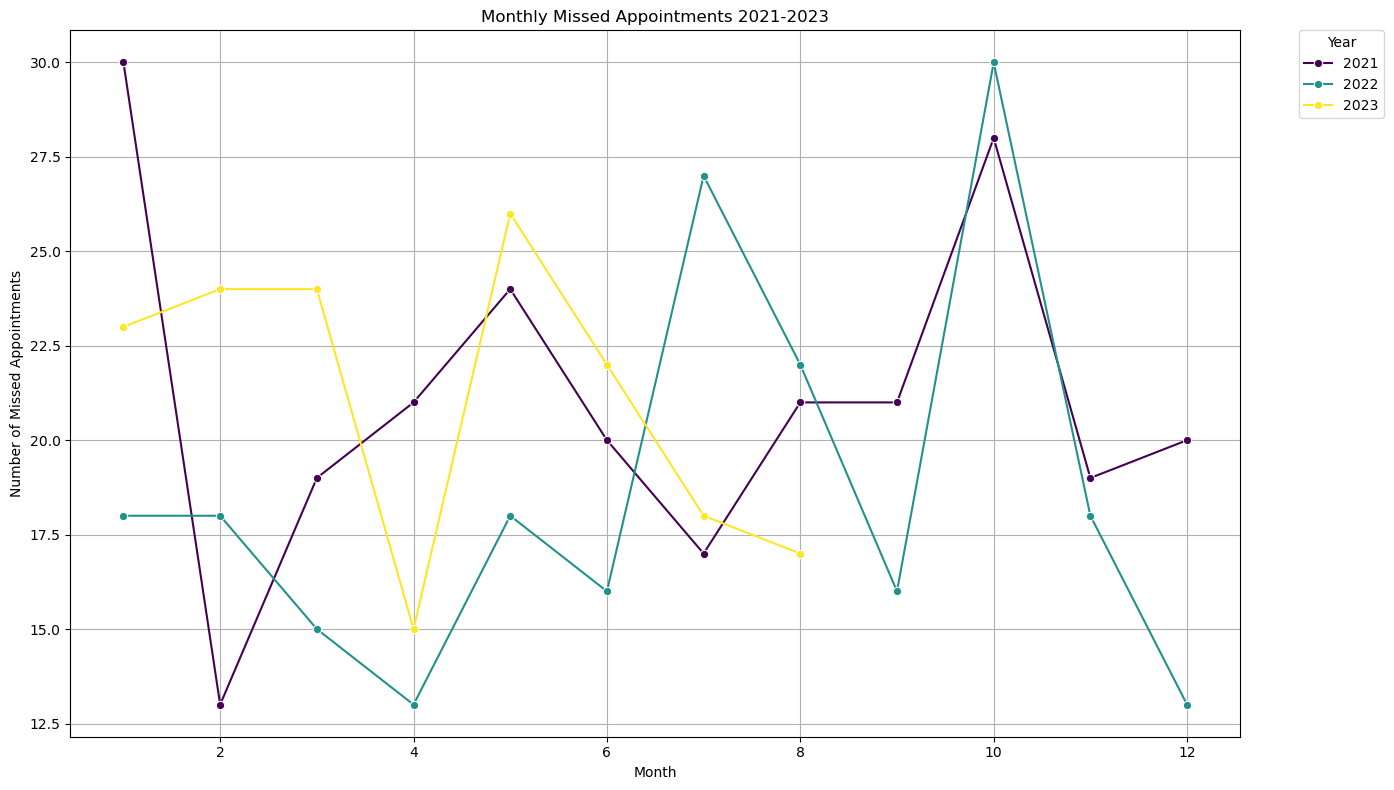

In [300]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=five_years_data, x='Month', y='Missed', hue='Year', marker='o', style='Year', dashes=False, palette='viridis')
plt.title('Monthly Missed Appointments 2021-2023')
plt.xlabel('Month')
plt.ylabel('Number of Missed Appointments')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)
plt.tight_layout()
plt.show()

## ---------------------------end of appointments work 

In [201]:
feedback.head(20)

,Survey ID,Patient ID,Date of Survey,Satisfaction Level,Comments
0,SV000001,P0059,2021-05-03 12:18:00,5,"Somewhat satisfied, but there's room for impro..."
1,SV000002,P0369,2020-10-15 12:11:00,8,Generally satisfied with the service.
2,SV000003,P0231,2018-10-14 13:06:00,5,"Somewhat satisfied, but there's room for impro..."
3,SV000004,P0206,2019-09-12 14:52:00,3,Very unsatisfied. Many issues during the visit.
4,SV000005,P0093,2023-02-05 15:50:00,6,"Somewhat satisfied, but there's room for impro..."
5,SV000006,P0264,2021-03-22 11:40:00,2,Very unsatisfied. Many issues during the visit.
6,SV000007,P0377,2019-06-17 09:04:00,9,Extremely satisfied! Great experience.
7,SV000008,P0242,2021-03-14 09:37:00,3,Very unsatisfied. Many issues during the visit.
8,SV000009,P0113,2016-03-08 11:46:00,7,Generally satisfied with the service.
9,SV000010,P0431,2020-07-17 09:49:00,4,"Somewhat satisfied, but there's room for impro..."


In [203]:
feedback.dtypes

Survey ID             object
Patient ID            object
Date of Survey        object
Satisfaction Level     int64
Comments              object
dtype: object

In [205]:
feedback = feedback.rename(columns={'Survey ID': 'Survey_ID', 'Patient ID':'Patient_ID', 'Date of Survey': 'Date_of_Survey', "Satisfaction Level":'Satisfaction_Level'})

In [207]:
feedback["Date_of_Survey"] = pd.to_datetime(feedback["Date_of_Survey"])

In [209]:
feedback["Month"] = feedback["Date_of_Survey"].dt.month

In [211]:
feedback["Year"] = feedback["Date_of_Survey"].dt.year

In [306]:
avg_satisfaction_by_year = feedback.groupby('Year')['Satisfaction_Level'].mean().reset_index()

In [308]:
avg_satisfaction_by_year

,Year,Satisfaction_Level
0,2016,5.457243
1,2017,5.532070
2,2018,5.525122
3,2019,5.643857
4,2020,5.527692
5,2021,5.677177
6,2022,5.278940
7,2023,5.390625


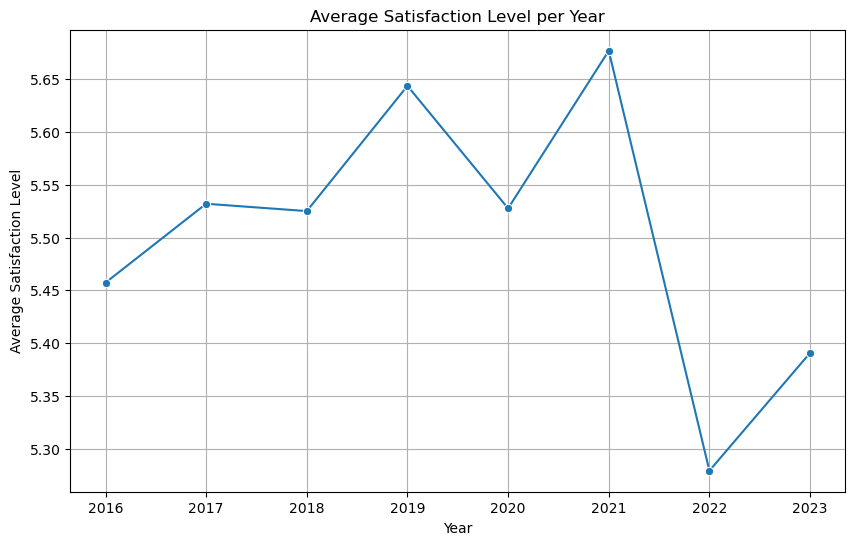

In [310]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_satisfaction_by_year, x='Year', y='Satisfaction_Level', marker='o')
plt.title('Average Satisfaction Level per Year')
plt.xlabel('Year')
plt.ylabel('Average Satisfaction Level')
plt.grid(True)
plt.show()

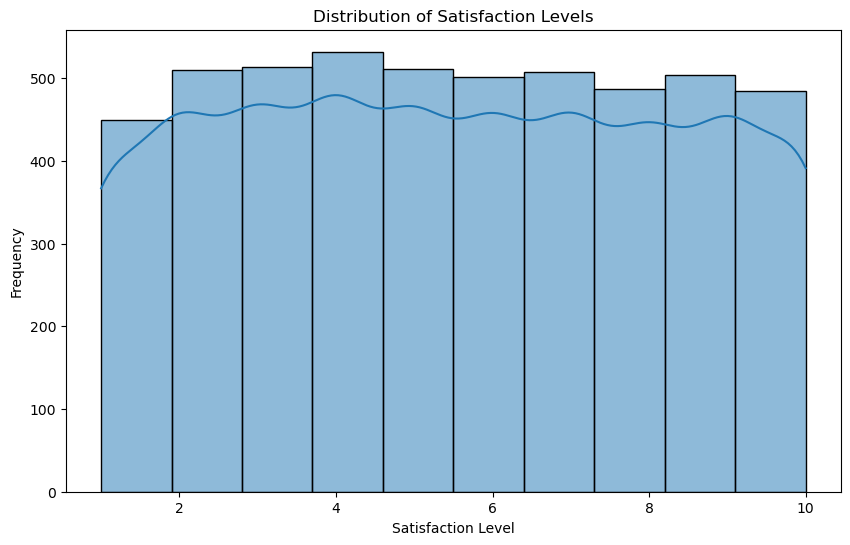

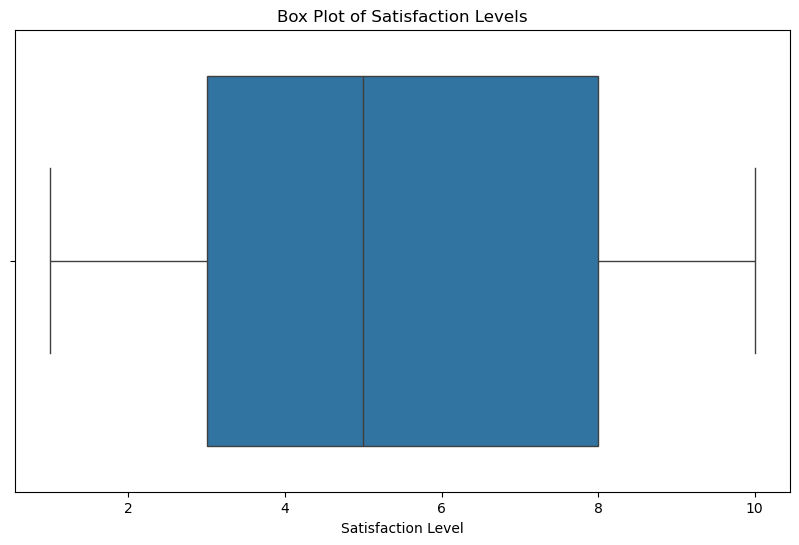

In [314]:
plt.figure(figsize=(10, 6))
sns.histplot(feedback['Satisfaction_Level'], bins=10, kde=True)
plt.title('Distribution of Satisfaction Levels')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.show()

#box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=feedback['Satisfaction_Level'])
plt.title('Box Plot of Satisfaction Levels')
plt.xlabel('Satisfaction Level')
plt.show()

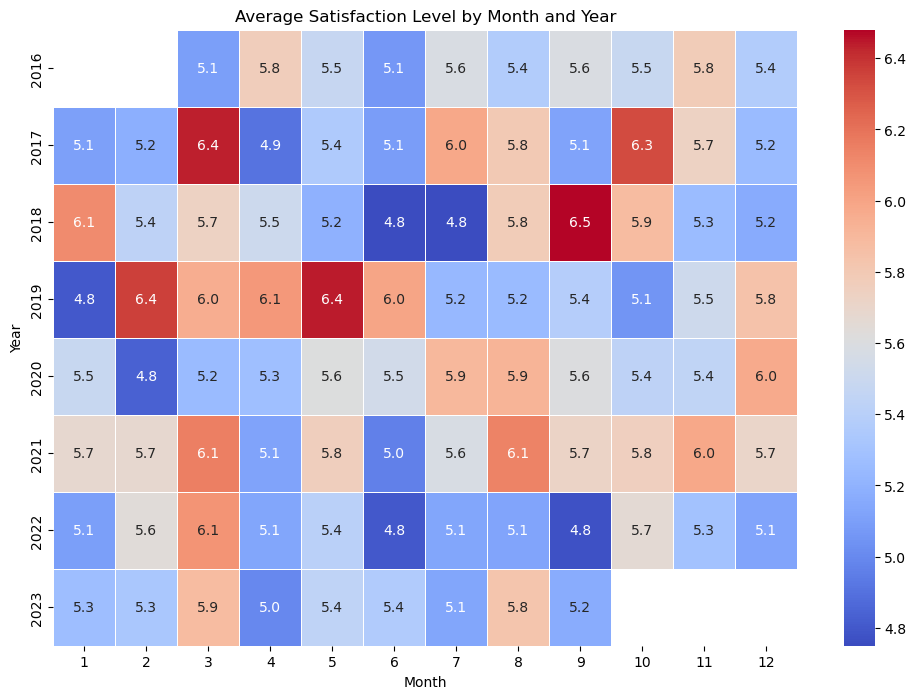

In [316]:
satisfaction_pivot = feedback.pivot_table(index='Year', columns='Month', values='Satisfaction_Level', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(satisfaction_pivot, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.title('Average Satisfaction Level by Month and Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

In [213]:
feedback

,Survey_ID,Patient_ID,Date_of_Survey,Satisfaction_Level,Comments,Month,Year
0,SV000001,P0059,2021-05-03 12:18:00,5,"Somewhat satisfied, but there's room for impro...",5,2021
1,SV000002,P0369,2020-10-15 12:11:00,8,Generally satisfied with the service.,10,2020
2,SV000003,P0231,2018-10-14 13:06:00,5,"Somewhat satisfied, but there's room for impro...",10,2018
3,SV000004,P0206,2019-09-12 14:52:00,3,Very unsatisfied. Many issues during the visit.,9,2019
4,SV000005,P0093,2023-02-05 15:50:00,6,"Somewhat satisfied, but there's room for impro...",2,2023
...,...,...,...,...,...,...,...
4995,SV004996,P0157,2023-07-06 14:21:00,2,Very unsatisfied. Many issues during the visit.,7,2023
4996,SV004997,P0118,2022-05-16 14:23:00,4,"Somewhat satisfied, but there's room for impro...",5,2022
4997,SV004998,P0082,2017-08-16 09:32:00,9,Extremely satisfied! Great experience.,8,2017
4998,SV004999,P0257,2022-02-14 16:17:00,5,"Somewhat satisfied, but there's room for impro...",2,2022


In [215]:
feedback.to_sql('feedback', engine, index=False, if_exists='replace')

5000

In [336]:
fbq1 = """
SELECT 
    Year,
    Month,
    Satisfaction_Level,
    COUNT(*) AS Count
FROM feedback
GROUP BY 
    Year, 
    Month, 
    Satisfaction_Level
ORDER BY 
    Year, 
    Month, 
    Satisfaction_Level;

"""
feedback_over_time = pd.read_sql_query(fbq1, engine)
feedback_over_time = pd.DataFrame(feedback_over_time)
feedback_over_time.to_csv("feedback_overTime.csv")

,Year,Month,Satisfaction_Level,Count
0,2016,3,1,7
1,2016,3,2,6
2,2016,3,3,6
3,2016,3,4,4
4,2016,3,5,1
...,...,...,...,...
895,2023,9,2,1
896,2023,9,4,1
897,2023,9,5,2
898,2023,9,7,1


# -----end of feedback 

In [362]:
outcomes.head(20)

,Appointment ID,Patient ID,Outcome Description,Follow-up Required
0,1,P0059,Improved,No
1,2,P0369,Unresolved,No
2,3,P0231,Improved,No
3,4,P0206,Complications,Yes
4,5,P0093,Unresolved,Yes
...,...,...,...,...
4995,4996,P0157,Unresolved,No
4996,4997,P0118,Improved,No
4997,4998,P0082,Successful,No
4998,4999,P0257,Complications,No


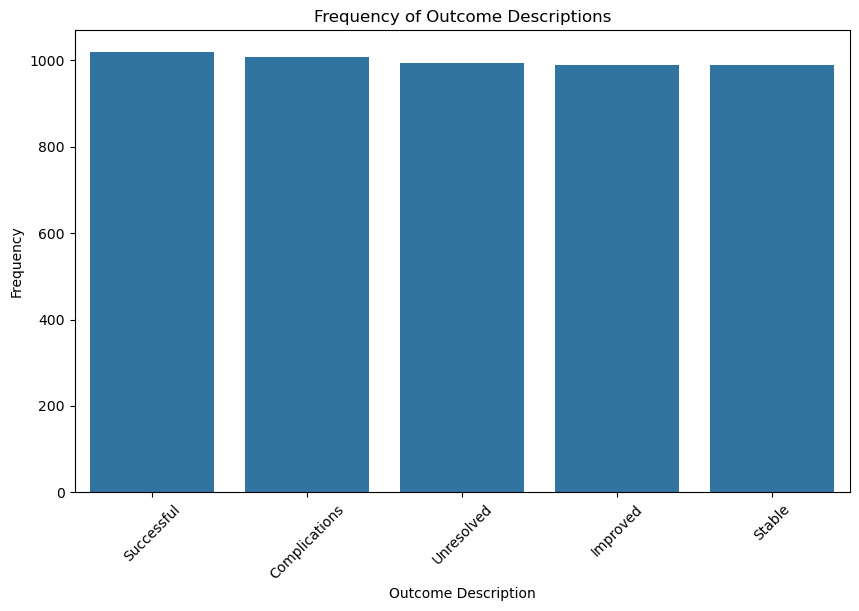

In [366]:
plt.figure(figsize=(10, 6))
sns.countplot(data=outcomes, x='Outcome Description', order=outcomes['Outcome Description'].value_counts().index)
plt.title('Frequency of Outcome Descriptions')
plt.xlabel('Outcome Description')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

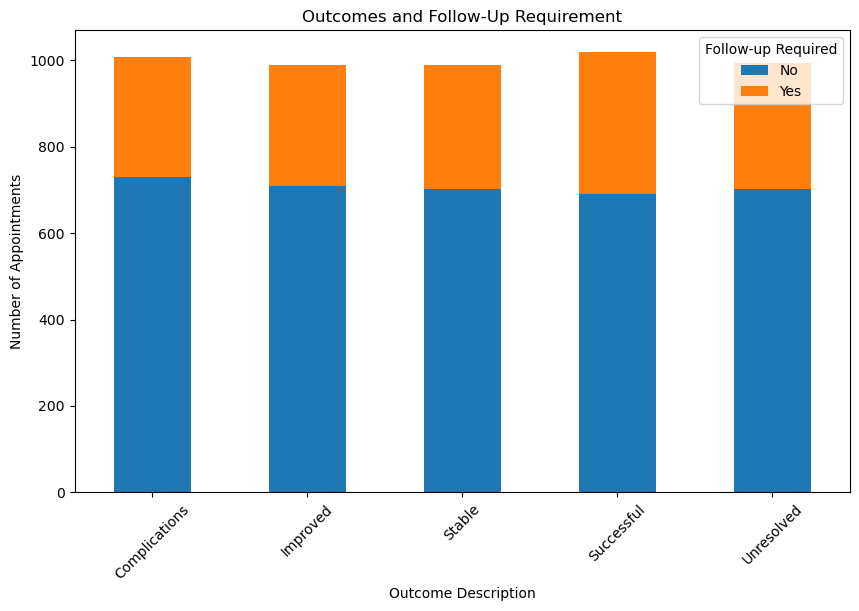

In [368]:
outcome_followup = pd.crosstab(outcomes['Outcome Description'], outcomes['Follow-up Required'])
outcome_followup.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Outcomes and Follow-Up Requirement')
plt.xlabel('Outcome Description')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.legend(title='Follow-up Required')
plt.show()

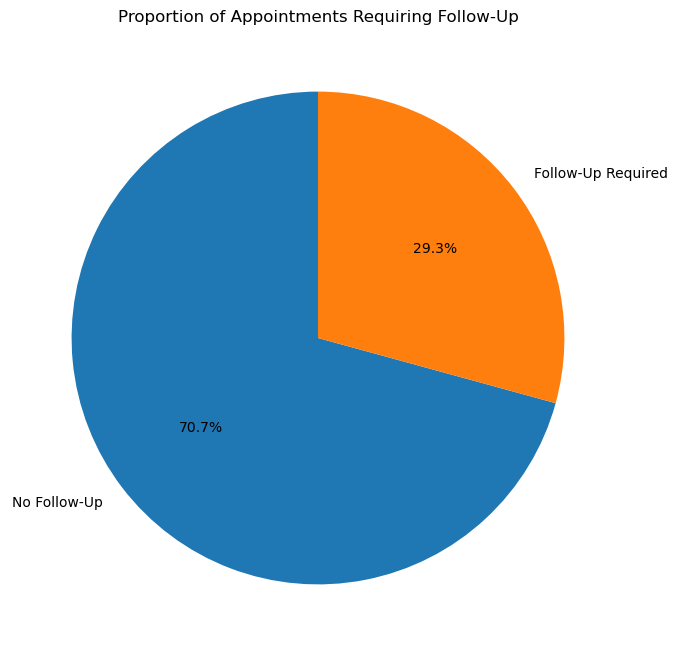

In [370]:
followup_counts = outcomes['Follow-up Required'].value_counts()
plt.figure(figsize=(8, 8))
followup_counts.plot.pie(autopct='%1.1f%%', startangle=90, labels=['No Follow-Up', 'Follow-Up Required'])
plt.title('Proportion of Appointments Requiring Follow-Up')
plt.ylabel('')  # Hide the y-label as it's unnecessary for pie charts
plt.show()

# ---end of outcomes

In [223]:
comms.head(20)

,Communication ID,Patient ID,Type of Reminder,Date and Time Sent,Response
0,C000001,P0059,SMS,2021-04-25 12:18:00,Received
1,C000002,P0369,Email,2020-10-07 12:11:00,Not Received
2,C000003,P0231,SMS,2018-10-06 13:06:00,Received
3,C000004,P0206,Email,2019-09-04 14:52:00,Received
4,C000005,P0093,SMS,2023-01-28 15:50:00,Not Received
5,C000006,P0264,Email,2021-03-14 11:40:00,Received
6,C000007,P0377,Email,2019-06-09 09:04:00,Received
7,C000008,P0242,Phone,2021-03-06 09:37:00,Received
8,C000009,P0113,Phone,2016-02-29 11:46:00,Received
9,C000010,P0431,Phone,2020-07-09 09:49:00,Received


In [225]:
comms = comms.rename(columns={'Date and Time Sent':"Sent", "Type of Reminder":"Type","Patient ID":"Patient_ID","Communication ID": "Comm_ID" })

In [227]:
comms['Sent'] = pd.to_datetime(comms['Sent'])
comms['Response'] = comms['Response'].astype('category')

In [229]:
comms.to_sql('communications', con=engine, index=False, if_exists='replace')

5000

In [231]:
comm_query = """
SELECT Type, Response, COUNT(*) AS count
FROM communications
GROUP BY Type, Response
ORDER BY Type, Response;
"""
response_counts = pd.read_sql_query(comm_query, engine)
response_counts

,Type,Response,count
0,Email,Not Received,339
1,Email,Received,1325
2,Phone,Not Received,313
3,Phone,Received,1360
4,SMS,Not Received,319
5,SMS,Received,1344


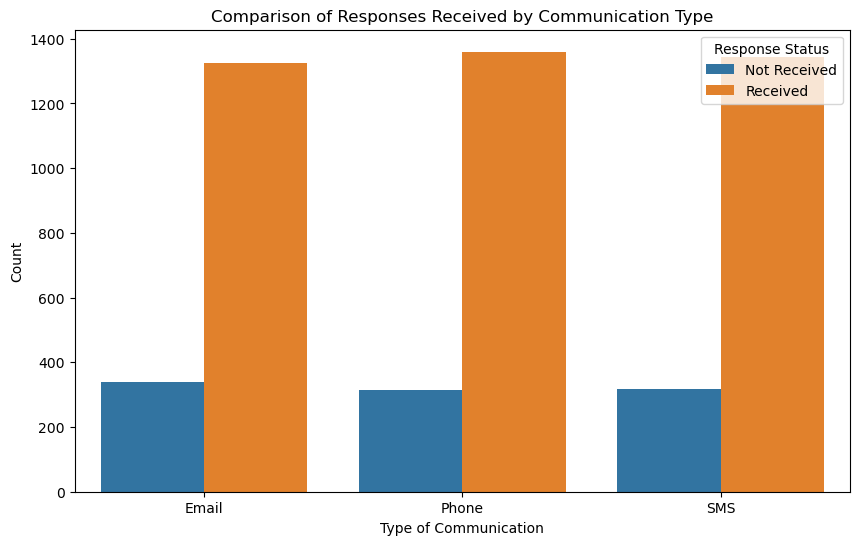

In [386]:
plt.figure(figsize=(10, 6))
sns.barplot(data=response_counts, x='Type', y='count', hue='Response')
plt.title('Comparison of Responses Received by Communication Type')
plt.xlabel('Type of Communication')
plt.ylabel('Count')
plt.legend(title='Response Status')
plt.show()

In [233]:
comms['Year'] = comms["Sent"].dt.year

In [235]:
comms['Month'] = comms["Sent"].dt.month

In [237]:
comms

,Comm_ID,Patient_ID,Type,Sent,Response,Year,Month
0,C000001,P0059,SMS,2021-04-25 12:18:00,Received,2021,4
1,C000002,P0369,Email,2020-10-07 12:11:00,Not Received,2020,10
2,C000003,P0231,SMS,2018-10-06 13:06:00,Received,2018,10
3,C000004,P0206,Email,2019-09-04 14:52:00,Received,2019,9
4,C000005,P0093,SMS,2023-01-28 15:50:00,Not Received,2023,1
...,...,...,...,...,...,...,...
4995,C004996,P0157,Phone,2023-06-28 14:21:00,Received,2023,6
4996,C004997,P0118,Phone,2022-05-08 14:23:00,Received,2022,5
4997,C004998,P0082,SMS,2017-08-08 09:32:00,Received,2017,8
4998,C004999,P0257,Email,2022-02-06 16:17:00,Not Received,2022,2


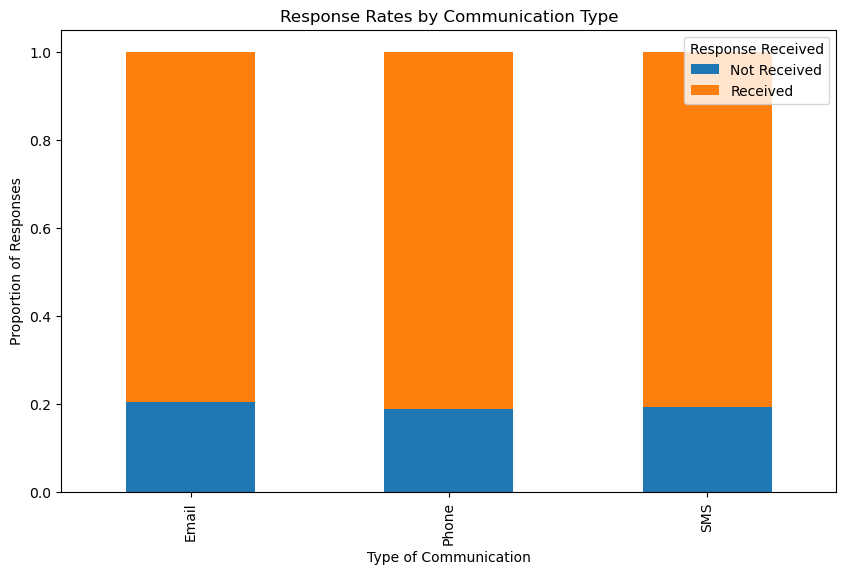

In [374]:
response_rate = comms.groupby('Type')['Response'].value_counts(normalize=True).unstack().fillna(0)
response_rate.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Response Rates by Communication Type')
plt.xlabel('Type of Communication')
plt.ylabel('Proportion of Responses')
plt.legend(title='Response Received')
plt.show()

/var/folders/50/kclhm2493yldwb75yt_k454r0000gn/T/ipykernel_5251/1999610840.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_communications = comms.set_index('Sent').resample('M').size()


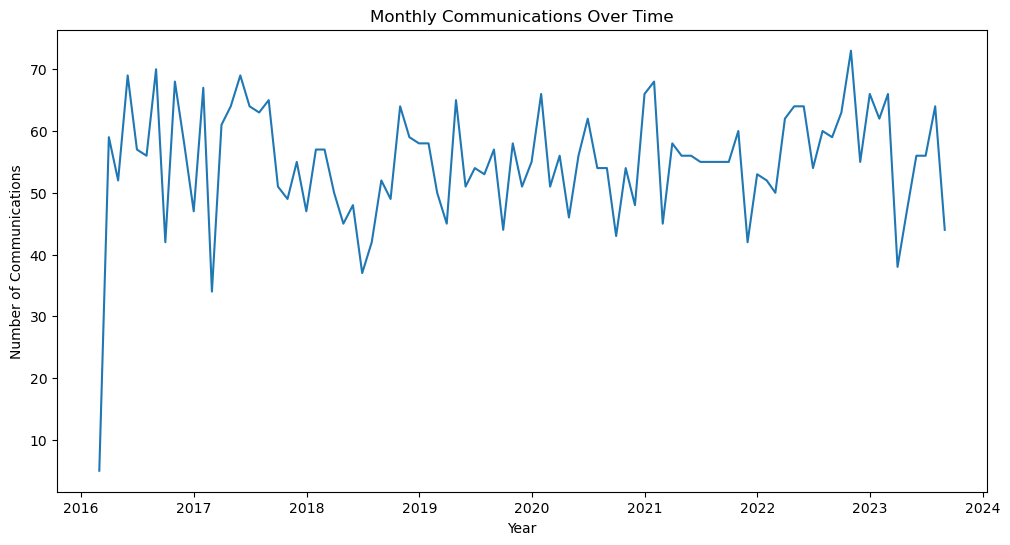

In [382]:
comms['Sent'] = pd.to_datetime(comms['Sent'])
monthly_communications = comms.set_index('Sent').resample('M').size()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_communications)
plt.title('Monthly Communications Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Communications')
plt.show()

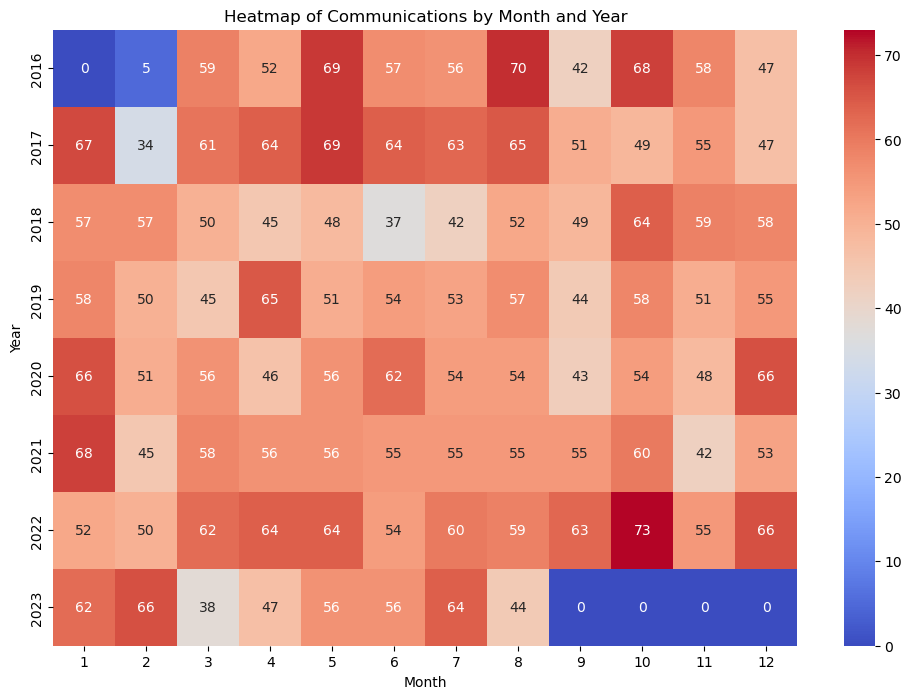

In [384]:
comms['Year'] = comms['Sent'].dt.year
comms['Month'] = comms['Sent'].dt.month
heatmap_data = comms.pivot_table(index='Year', columns='Month', values='Comm_ID', aggfunc='count', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt="d")
plt.title('Heatmap of Communications by Month and Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

# ---end of comms

In [240]:
demographics.head(20)

,Patient ID,Age,Gender,Location,Visit Frequency,Previous No-Shows
0,P0001,54,Female,"('Cumming', 'Georgia')",8,3
1,P0002,72,Male,"('Dahlonega', 'Georgia')",6,3
2,P0003,73,Male,"('Ridgeview Forest', 'Georgia')",5,2
3,P0004,84,Female,"('Cumming', 'Georgia')",9,1
4,P0005,65,Female,"('Cumming', 'Georgia')",20,4
5,P0006,70,Male,"('Dahlonega', 'Georgia')",14,2
6,P0007,51,Female,"('Cumming', 'Georgia')",13,5
7,P0008,66,Male,"('Lilburn', 'Georgia')",20,5
8,P0009,29,Female,"('Cumming', 'Georgia')",5,5
9,P0010,18,Male,"('Cumming', 'Georgia')",15,5


In [242]:
demographics[['City', 'State']] = demographics['Location'].str.split(',', n=1, expand=True)

In [244]:
demographics['City'] = demographics['City'].str.replace("['()]", "", regex=True)
demographics['State'] = demographics['State'].str.replace("['()]", "", regex=True)
demographics.drop("Location", axis=1, inplace=True)

In [246]:
demographics.to_sql('demographics', engine, index=False, if_exists='replace')

173

In [248]:
demographics = demographics.rename(columns = {"Patient ID": "Patient_ID", "Visit Frequency":"Visits", "Previous No-Shows":"Previous_Missed"})

In [422]:
demographics.to_csv('demographics_clean.csv')

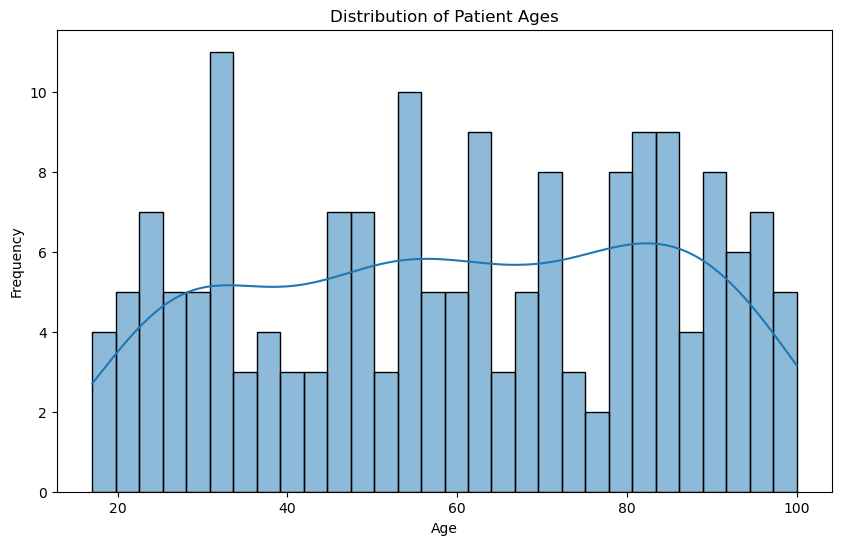

In [388]:
plt.figure(figsize=(10, 6))
sns.histplot(data=demographics, x='Age', bins=30, kde=True)  
plt.title('Distribution of Patient Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

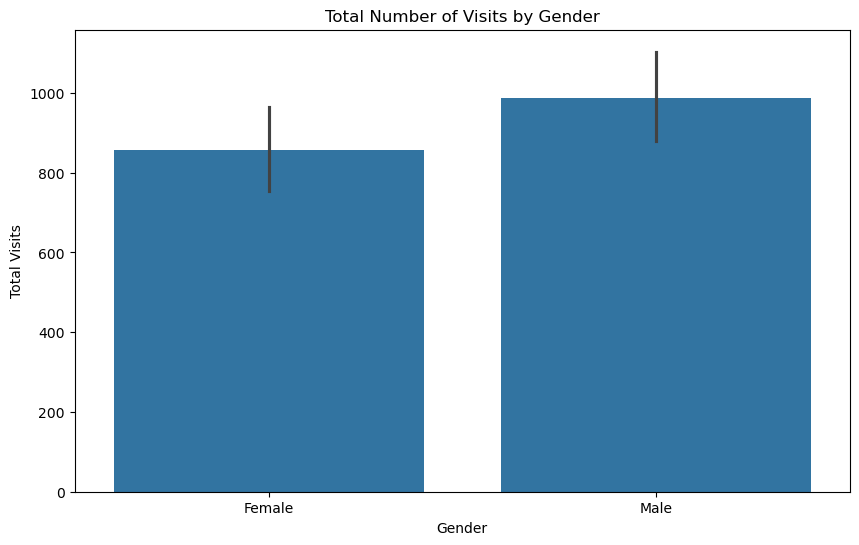

In [390]:
plt.figure(figsize=(10, 6))
sns.barplot(data=demographics, x='Gender', y='Visits', estimator=sum)  # sum can be replaced with np.mean for average
plt.title('Total Number of Visits by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Visits')
plt.show()

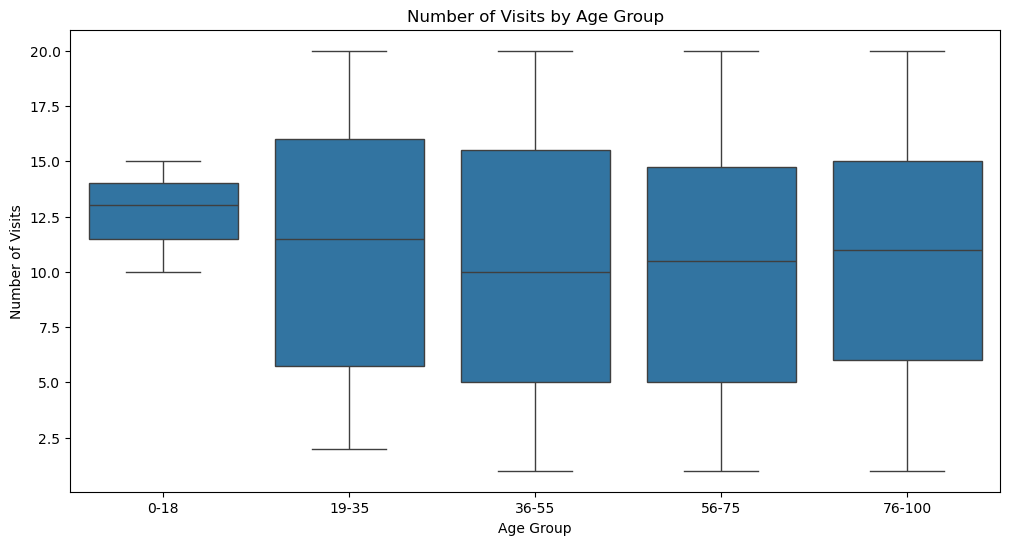

In [392]:
demographics['Age Group'] = pd.cut(demographics['Age'], bins=[0, 18, 35, 55, 75, 100], labels=['0-18', '19-35', '36-55', '56-75', '76-100'])

plt.figure(figsize=(12, 6))
sns.boxplot(data=demographics, x='Age Group', y='Visits')
plt.title('Number of Visits by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Visits')
plt.show()

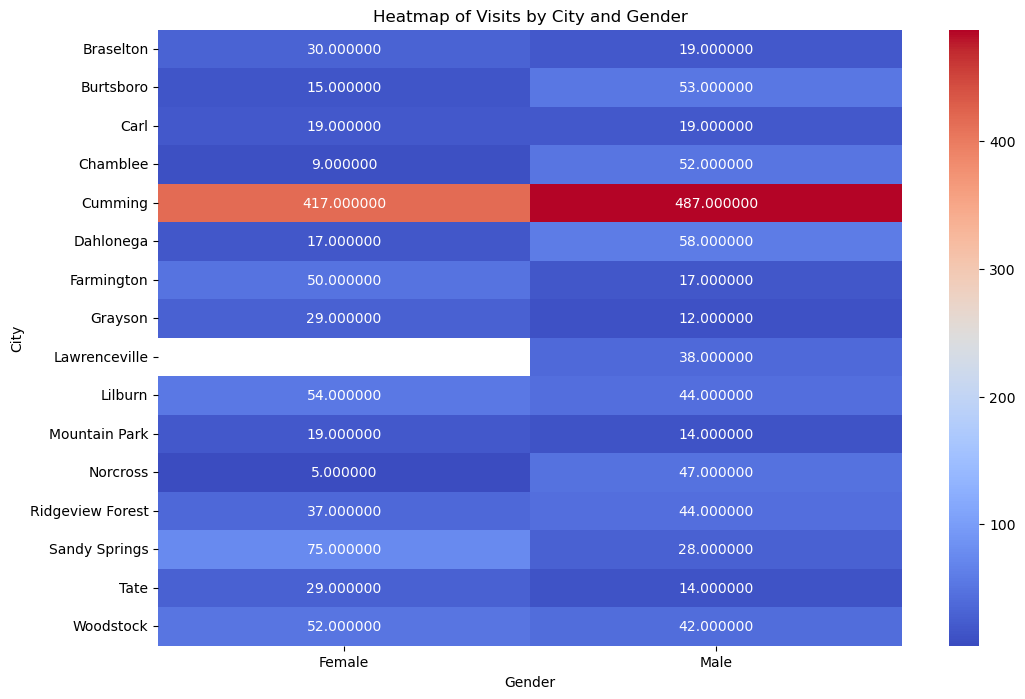

In [400]:
city_visits = demographics.pivot_table(index='City', columns='Gender', values='Visits', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(city_visits, annot=True, cmap='coolwarm', fmt="f")
plt.title('Heatmap of Visits by City and Gender')
plt.xlabel('Gender')
plt.ylabel('City')
plt.show()

In [ ]:
#------------

In [252]:
resources.head(20) #short, 13 rows only 

,Resource ID,Type of Resource,Availability Times
0,Room 100,Consultation Room,9AM-5PM
1,Room 101,Consultation Room,9AM-5PM
2,Room 102,Consultation Room,9AM-5PM
3,Room 103,Consultation Room,9AM-5PM
4,Room 104,Consultation Room,9AM-5PM
5,Room 105,Consultation Room,9AM-5PM
6,Room 106,Consultation Room,9AM-5PM
7,Room 107,Consultation Room,9AM-5PM
8,Room 108,Treatment Room,9AM-5PM
9,Room 109,Treatment Room,9AM-5PM


In [254]:
staff.head() #short 

,Staff ID,Staff Role,Staff Name,Available Times,Location
0,S001,Doctor,Dr. Madhavi Rayapudi,9AM-5PM,John's Creek
1,S002,Nurse Practitioner,Kim Neadow,8AM-4PM,Northside
2,S003,Physician's Assistant,Carly Landry,10AM-6PM,John's Creek
